In [116]:
import numpy as np
import numpy.random as rnd
from scipy import random
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

def energy_ising_2d(spin_arr, J):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -J *spin_arr * convolve(spin_arr, kern, mode='constant', cval=0)
    return arr.sum()

def lattice(n_lattice_sites):
    lattice_n = 2*np.random.randint(2, size=(n_lattice_sites, n_lattice_sites))-1   
    return lattice_n    

Starting configuration:


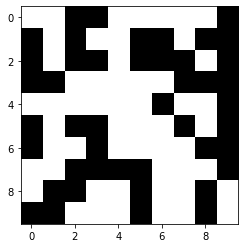

0+10:  Energy: -56 Spin: 0.12


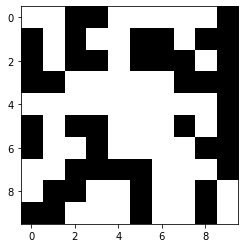

10+10:  Energy: -46 Spin: 0.06


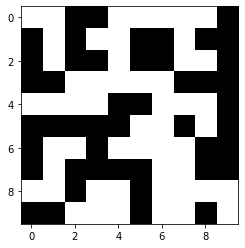

20+10:  Energy: -36 Spin: 0.0


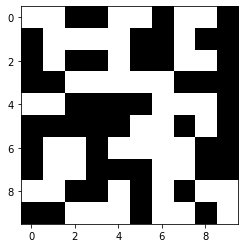

30+10:  Energy: -38 Spin: -0.08


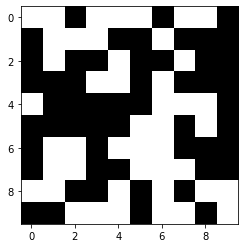

40+10:  Energy: -34 Spin: 0.02


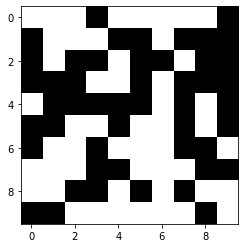

50+10:  Energy: -62 Spin: 0.06


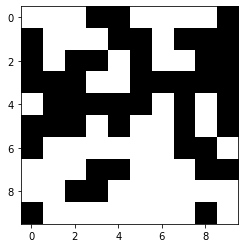

60+10:  Energy: -50 Spin: 0.08


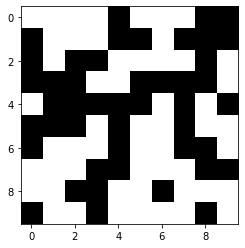

70+10:  Energy: -48 Spin: 0.0


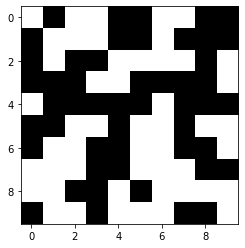

80+10:  Energy: -40 Spin: -0.04


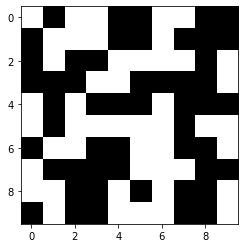

90+10:  Energy: -38 Spin: -0.06


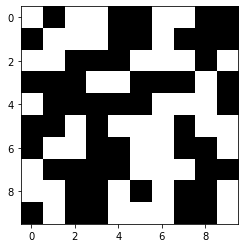

-------------------------------------------------------------------------------------


In [117]:
random_seed = 1
np.random.seed(random_seed)
def metropolis(spin_arr, n_steps, n_lattice_sites, beta, energy, debug=False,save_freq=10):
    average_spins = []
    current_energys = []
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(n_steps-1)
    net_energy = np.zeros(n_steps-1)
    if debug is True: 
        print("Starting configuration:")
        plt.imshow(spin_arr,cmap="gray")   
        plt.show() 
    for t in range(0,n_steps-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,n_lattice_sites)
        y = np.random.randint(0,n_lattice_sites)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-beta*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
        net_spins = spin_arr.mean()  
        net_energy = energy
        if t%save_freq == 0:
            average_spins.append(net_spins) 
            current_energys.append(net_energy)
            average_spin = spin_arr.mean()
        if debug and t%10==0: 
            print("%i+10: "%t,"Energy:",energy,"Spin:",average_spin)
            plt.imshow(spin_arr,cmap="gray")   
            plt.show()  
        configurationq = spin_arr    
    return average_spins, current_energys, configurationq



####################

###########
random_seed = 1
np.random.seed(random_seed)
def metropoliss(spin_arr, n_steps, n_lattice_sites, beta, energy, debug=False):
    average_spins = []
    current_energys = []
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(n_steps-1)
    net_energy = np.zeros(n_steps-1)
    #if debug is True: 
        #print("Starting configuration:")
        #plt.imshow(spin_arr,cmap="gray")   
        #plt.show()

    for t in range(0,n_steps-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,n_lattice_sites)
        y = np.random.randint(0,n_lattice_sites)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-beta*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
        net_spins = spin_arr.mean()  
        net_energy = energy
        average_spins.append(net_spins) 
        current_energys.append(net_energy)
        average_spin = spin_arr.mean()  
        configurationq = spin_arr    
    return average_spins, current_energys, configurationq

random_seed = 1
np.random.seed(random_seed)
def metropolisss(spin_arr, n_steps, n_lattice_sites, beta, energy, debug=False):
    average_spins = []
    current_energys = []
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(n_steps-1)
    net_energy = np.zeros(n_steps-1)
    #if debug is True: 
        #print("Starting configuration:")
        #plt.imshow(spin_arr,cmap="gray")   
        #plt.show()

    for t in range(0,n_steps-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,n_lattice_sites)
        y = np.random.randint(0,n_lattice_sites)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<n_lattice_sites-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-beta*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy 
    return net_spins, net_energy





###########################################################################################################


average_spins, current_energys, configurationq = metropolis(lattice(n_lattice_sites=10), n_steps=100, n_lattice_sites=10, beta=0.1, energy=energy_ising_2d(spin_arr=lattice(n_lattice_sites=10), J=1), debug=True)
print("-------------------------------------------------------------------------------------")



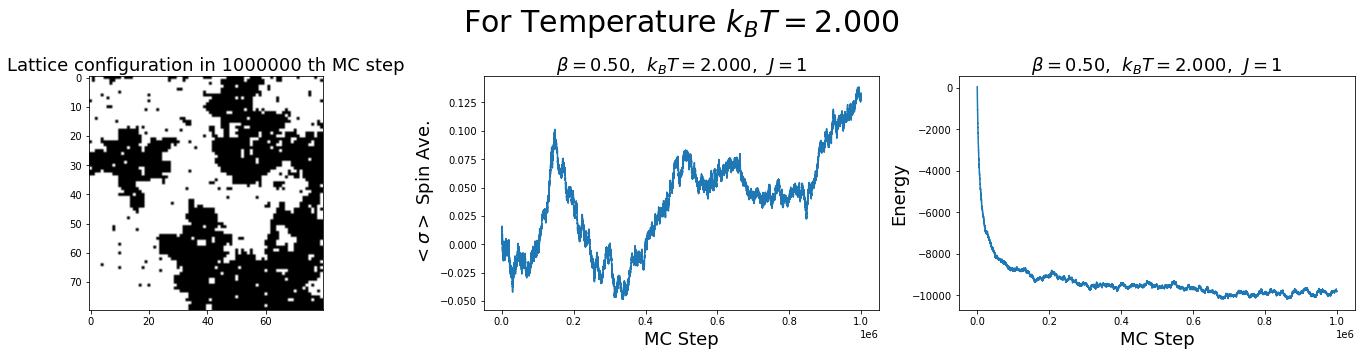

--------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------


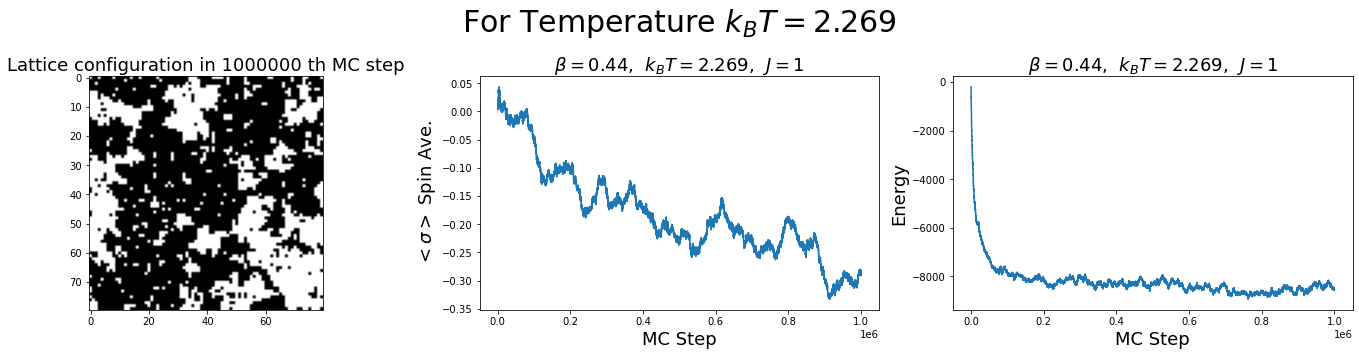

--------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------


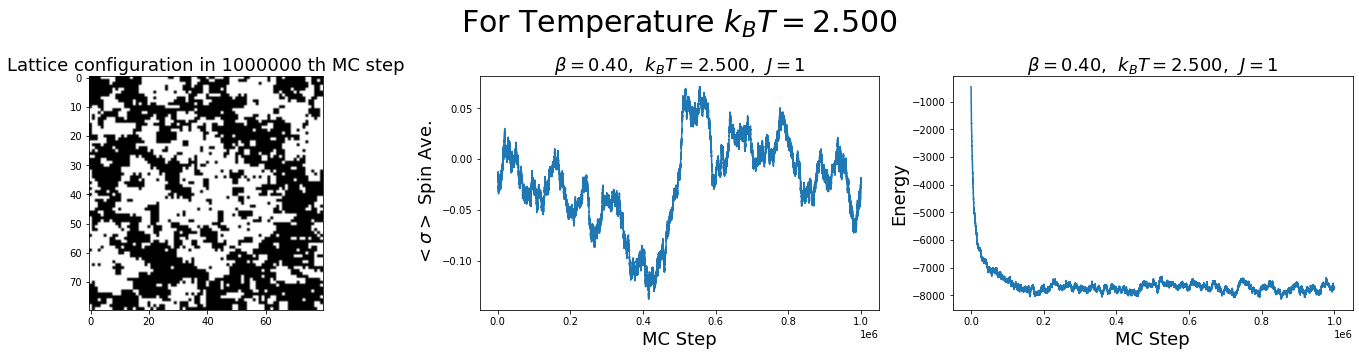

--------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------


In [120]:


test_n_lattice_sites = 80
test_J = 1



test_n_steps = 1000000


temperatures = [2.0, 2.269, 2.5]

for K_T in temperatures:
    test_beta = 1/K_T
    average_spins, current_energys, configurationq = metropoliss(lattice(n_lattice_sites=test_n_lattice_sites), n_steps=test_n_steps, n_lattice_sites=test_n_lattice_sites, beta=test_beta, energy=energy_ising_2d(spin_arr=lattice(n_lattice_sites=test_n_lattice_sites), J=test_J), debug=True)
    plt.subplots(figsize=(19, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(configurationq,cmap="gray")
    plt.title("Lattice configuration in %d th MC step"%(test_n_steps), fontsize=18)
    

    plt.subplot(1, 3, 2)
    plt.plot(average_spins)
    plt.ylabel("$<\sigma> $ Spin Ave.", fontsize=18)
    plt.xlabel("MC Step", fontsize=18)
    plt.title("$\\beta=%.2f$,  $k_BT=%.3f$,  $J=%.f$"%(test_beta,K_T,test_J), fontsize=18)
    
    plt.subplot(1, 3, 3)
    plt.plot(current_energys)
    plt.ylabel("Energy", fontsize=18)
    plt.xlabel("MC Step", fontsize=18)
    plt.title("$\\beta=%.2f$,  $k_BT=%.3f$,  $J=%.f$"%(test_beta,K_T,test_J), fontsize=18)
    
    plt.suptitle("For Temperature $k_BT=%.3f$"%(K_T), fontsize=30)
    plt.tight_layout()
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------")





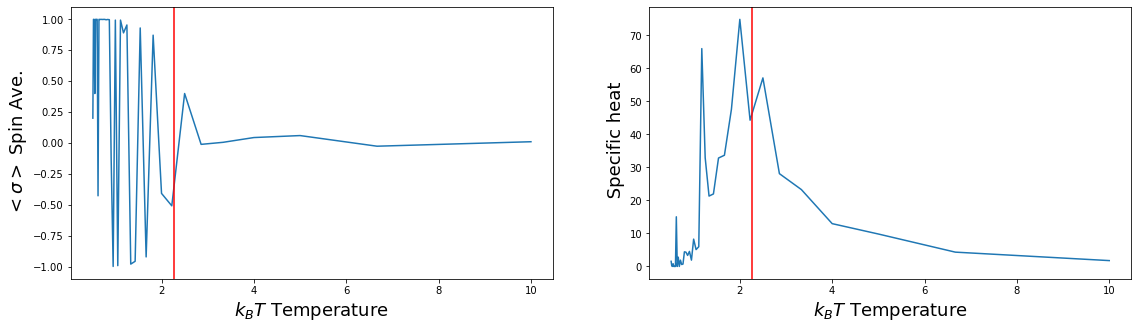

K T_c = 2.269


In [106]:

test_n_lattice_sites = 10
test_J = 1

test_n_steps = 10000

def get_spin_energy(latticee, Bs):
    ms = np.zeros(len(Bs))
    E_stds = np.zeros(len(Bs))
    for i, bj in enumerate(Bs):
        spins, energies = metropolisss(latticee, test_n_steps, test_n_lattice_sites, bj, energy_ising_2d(latticee, test_J), debug=False) 
        ms[i] = spins[-5000:].mean()/test_n_lattice_sites**2
        E_stds[i] = energies[-5000:].std()**2
    return ms, E_stds
    


    
Bs = np.arange(0.1, 2, 0.05)
ms_n, E_stds_n = get_spin_energy(lattice(n_lattice_sites=test_n_lattice_sites), Bs)

plt.subplots(figsize=(19, 5))
plt.subplot(1, 2, 1)
plt.plot(1/Bs, ms_n)
plt.axvline(x=2.269,color = 'r')
plt.ylabel("$<\sigma> $ Spin Ave.", fontsize=18)
plt.xlabel("$k_BT$ Temperature", fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(1/Bs, E_stds_n*(Bs**2))
plt.axvline(x=2.269,color = 'r')
plt.ylabel(" Specific heat", fontsize=18)
plt.xlabel("$k_BT$ Temperature", fontsize=18)
plt.show()
print("K T_c = 2.269")


